# 001 Data Exploration Spatial Distributions of Pings
* This notebooke includes scripts for explorating data and spatial distributions of pings and creating FigS1.

In [1]:
import os
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Check package versions
import types 
def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__

import pkg_resources
root_packages = [i.split('.', 1)[0] for i in list(imports())] 
for m in pkg_resources.working_set:
    if m.project_name.lower() in root_packages:
        print (m.project_name, m.version)

('pandas', '0.24.0')
('numpy', '1.15.4')
('matplotlib', '2.2.3')


In [3]:
# function for formatting numeric number
def place_value(number):
    return ("{:,}".format(number))

# function for checking file size
def convert_bytes(num):
    """this function will convert bytes to MB, GB, etc"""
    for x in ['bytes', 'KB', 'MB', 'GB', 'TB']:
        if num < 1024.0:
            return "%3.1f %s" % (num, x)
        num /= 1024.0
        
def file_size(file_path):
    """this function will return the file size"""
    if os.path.isfile(file_path):
        file_info = os.stat(file_path)
        return convert_bytes(file_info.st_size)

In [4]:
# Check the file size of the file using file path
file_path = "../../data/huston_aug_sep_2017_highway.csv"
print (file_size(file_path))

None


## Load data

In [3]:
df_hs = pd.read_csv(file_path)

### Extract the two week period (2017-08-20 ~ 2017-09-02) data

In [4]:
date_list = ['2017-08-20', '2017-08-21', '2017-08-22', '2017-08-23', '2017-08-24', '2017-08-25', '2017-08-26',
            '2017-08-27', '2017-08-28', '2017-08-29', '2017-08-30', '2017-08-31', '2017-09-01', '2017-09-02']
df_hs = df_hs[df_hs['timestamp'].str[:10].isin(date_list)]

In [5]:
# Standardize 'ad_id' (all lowercase)
df_hs['ad_id'] = df_hs['ad_id'].str.lower()
df_hs['timestamp'] = pd.to_datetime(df_hs['timestamp'], errors = 'coerce')
df_hs['yymmdd'] = df_hs['timestamp'].dt.date
df_hs['yymmdd hh'] = df_hs['timestamp'].dt.round('H')
df_hs['yymmdd hhmm'] = df_hs['timestamp'].dt.round('min')

In [6]:
# Extract non 0000000000 ad_id
df_hs = df_hs[df_hs['ad_id']!='00000000-0000-0000-0000-000000000000']

In [ ]:
df_hs = df_hs[['app_id', 'ad_id', 'id_type', 'country_code', 'device_make', 'device_model', 'device_os',
                        'device_os_version', 'latitude', 'longitude', 'timestamp', 'ip_address', 
                         'horizontal_accuracy', 'vertical_accuracy', 'foreground',
              'yymmdd', 'yymmdd hh', 'yymmdd hhmm']].drop_duplicates()

In [8]:
df_hs['datetime'] = pd.to_datetime(df_hs['timestamp']) + pd.DateOffset(hours=-5)

df_hs['hour'] = df_hs['timestamp'].dt.hour
df_hs['day'] = df_hs['timestamp'].dt.dayofweek
df_hs['date'] = df_hs['timestamp'].dt.day

# Spatial distributions of ping locations
### 1) Number of pings

In [9]:
df_hs_ping_hh = df_hs[['ad_id','latitude', 'longitude', 'hour', 'date']]
df_hs_ping_hh.head(2)

,ad_id,latitude,longitude,hour,date
50984,eee95218-e2df-4b6d-866f-dee3856e6b08,29.85295,-95.67563,0,20
50985,88d2fa3b-6edb-4ba5-b37c-c63402597f46,29.70765,-95.61574,0,20


In [12]:
cmap = plt.cm.get_cmap('coolwarm')

my_cmap = cmap(np.arange(cmap.N))
my_cmap[:,-1] = np.linspace(0, 1, cmap.N)
my_cmap = ListedColormap(my_cmap)

In [15]:
def grid_map_pings(date, time):
    plt.figure(figsize=(10,8))
    plt.rcParams['axes.facecolor'] ='black'
    plt.hist2d(df_hs_ping_hh['longitude'][(df_hs_ping_hh['date']==date)&(df_hs_ping_hh['hour']==time)], 
                          df_hs_ping_hh['latitude'][(df_hs_ping_hh['date']==date)&(df_hs_ping_hh['hour']==time)], 
               bins=(200,120), cmap=my_cmap)
    plt.colorbar()
    plt.clim(-150,1000)
    plt.title('Spatial distributions of ping locations, August %i, %i:00:00' %(date,time))
    plt.show()

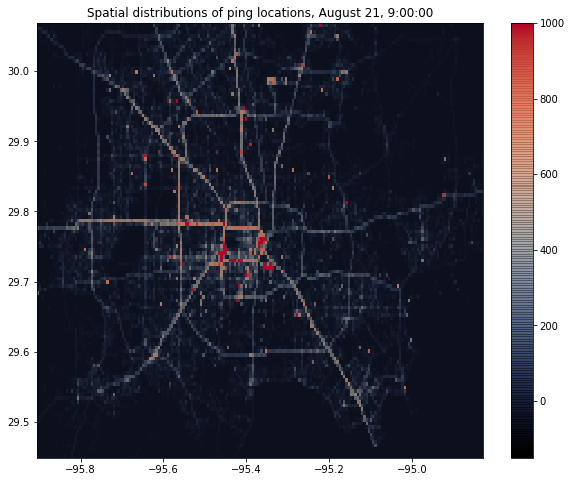

In [16]:
grid_map_pings(21,9)

### 2) Number of users

In [17]:
df_hs_user_hh = df_hs_ping_hh.drop_duplicates()

In [18]:
print (place_value(len(df_hs_ping_hh)))
print (place_value(len(df_hs_user_hh)))

281,173,611
202,462,983


In [32]:
def grid_map_users(date, time):
    plt.figure(figsize=(10,8))
    plt.hist2d(df_hs_user_hh['longitude'][(df_hs_user_hh['date']==date)&(df_hs_user_hh['hour']==time)], 
                          df_hs_user_hh['latitude'][(df_hs_user_hh['date']==date)&(df_hs_user_hh['hour']==time)], 
               bins=(200,120), cmap=my_cmap)
    plt.colorbar()
    plt.clim(-50,400)
    plt.title('Spatial distributions of user locations, August %i, %i:00:00' %(date,time))
    # plt.savefig('../figures/FigS1_%i_%i.svg'%(date, time), format='png', dpi=300) 
    plt.show()

### Create FigS1.

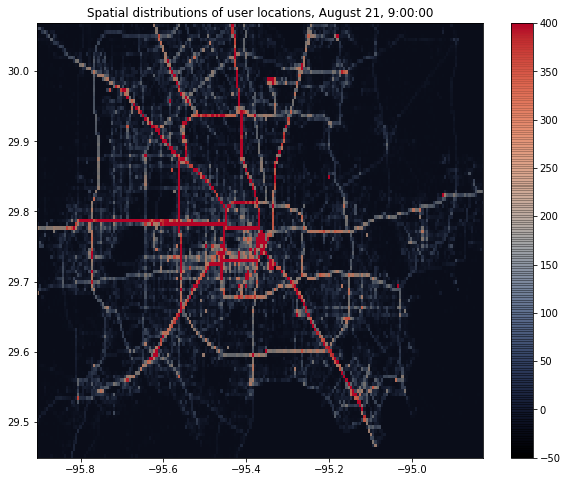

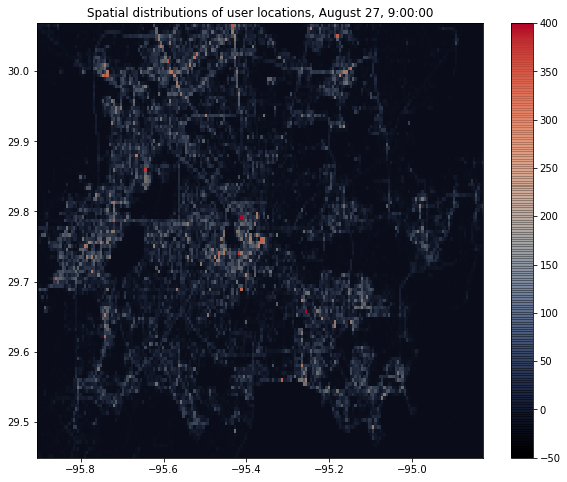

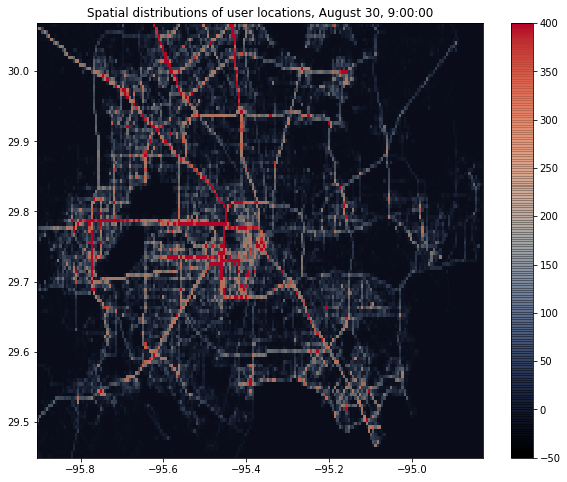

In [33]:
# Generate 1km X 1km grid level spatial distributions of ping locations
# August 21, 9AM
grid_map_users(21,9)

# August 27, 9AM
grid_map_users(27,9)

# August 31, 9AM
grid_map_users(30,9)